In [60]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib inline

In [61]:
def update_Bern(img, row, col):
    img_ij = img[row:-1:2, col:-1:2]
    img_prev = img[row - 1:-2:2, col:-1:2]; img_next = img[row + 1::2, col:-1:2]
    img_left = img[row:-1:2, col - 1:-2:2]; img_rigt = img[row:-1:2, col + 1::2]

    d1 = (img_prev + img_next)/2.0 - img_ij; d2 = (img_left + img_rigt)/2.0 - img_ij
    d_m = d1 * (np.abs(d1) <= np.abs(d2)) + d2 * (np.abs(d2) < np.abs(d1))
    img_ij[...] += d_m
    
def update_MC(img, row, col):
    img_ij = img[row:-1:2, col:-1:2]; img_ij8 = 8*img_ij
    img_prev = img[row - 1:-2:2, col:-1:2]; img_next = img[row + 1::2, col:-1:2]
    img_left = img[row:-1:2, col - 1:-2:2]; img_rigt = img[row:-1:2, col + 1::2]
    img_leUp = img[row - 1:-2:2, col - 1:-2:2]; img_riUp = img[row - 1:-2:2, col + 1::2];
    img_leDn = img[row + 1::2, col - 1:-2:2]; img_riDn = img[row + 1::2, col + 1::2];

    d1 = 2.5 * (img_prev + img_next) + 5.0 * img_rigt - img_riUp - img_riDn - img_ij8;
    d2 = 2.5 * (img_prev + img_next) + 5.0 * img_left - img_leUp - img_leDn - img_ij8;
    d3 = 2.5 * (img_left + img_rigt) + 5.0 * img_prev - img_leUp - img_riUp - img_ij8;
    d4 = 2.5 * (img_left + img_rigt) + 5.0 * img_next - img_leDn - img_riDn - img_ij8;
    
    d = d1 * (np.abs(d1) <= np.abs(d2)) + d2 * (np.abs(d2) < np.abs(d1))
    d = d * (np.abs(d) <= np.abs(d3)) + d3 * (np.abs(d3) < np.abs(d))
    d = d * (np.abs(d) <= np.abs(d4)) + d4 * (np.abs(d4) < np.abs(d))
    
    d /= 8
    
    img_ij[...] += d
    
def update_GC(img, row, col):
    img_ij = img[row:-1:2, col:-1:2]; 
    img_prev = img[row - 1:-2:2, col:-1:2]; img_next = img[row + 1::2, col:-1:2]
    img_left = img[row:-1:2, col - 1:-2:2]; img_rigt = img[row:-1:2, col + 1::2]
    img_leUp = img[row - 1:-2:2, col - 1:-2:2]; img_riUp = img[row - 1:-2:2, col + 1::2];
    img_leDn = img[row + 1::2, col - 1:-2:2]; img_riDn = img[row + 1::2, col + 1::2];

    d1 = (img_prev + img_next)/2.0 - img_ij; d2 = (img_left + img_rigt)/2.0 - img_ij
    d3 = (img_leUp + img_riDn)/2.0 - img_ij; d4 = (img_leDn + img_riUp)/2.0 - img_ij
    d5 = (img_prev + img_leUp + img_left)/3.0 - img_ij; d6 = (img_prev + img_riUp + img_rigt)/3.0 - img_ij
    d7 = (img_leDn + img_left + img_next)/3.0 - img_ij; d8 = (img_rigt + img_riDn + img_next)/3.0 - img_ij
    
    d = d1 * (np.abs(d1) <= np.abs(d2)) + d2 * (np.abs(d2) < np.abs(d1))
    d = d * (np.abs(d) <= np.abs(d3)) + d3 * (np.abs(d3) < np.abs(d))
    d = d * (np.abs(d) <= np.abs(d4)) + d4 * (np.abs(d4) < np.abs(d))
    d = d * (np.abs(d) <= np.abs(d5)) + d5 * (np.abs(d5) < np.abs(d))
    d = d * (np.abs(d) <= np.abs(d6)) + d6 * (np.abs(d6) < np.abs(d))
    d = d * (np.abs(d) <= np.abs(d7)) + d7 * (np.abs(d7) < np.abs(d))
    d = d * (np.abs(d) <= np.abs(d8)) + d8 * (np.abs(d8) < np.abs(d))
    
    img_ij[...] += d

def update_TV(img, row, col):
    img_ij = img[row:-1:2, col:-1:2]; img_ij5 = 5*img_ij
    img_prev = img[row - 1:-2:2, col:-1:2]; img_next = img[row + 1::2, col:-1:2]
    img_left = img[row:-1:2, col - 1:-2:2]; img_rigt = img[row:-1:2, col + 1::2]
    img_leUp = img[row - 1:-2:2, col - 1:-2:2]; img_riUp = img[row - 1:-2:2, col + 1::2];
    img_leDn = img[row + 1::2, col - 1:-2:2]; img_riDn = img[row + 1::2, col + 1::2];

    d1 = img_prev + img_next + img_left + img_leUp + img_leDn - img_ij5;
    d2 = img_prev + img_next + img_rigt + img_riUp + img_riDn - img_ij5;
    d3 = img_left + img_rigt + img_leUp + img_prev + img_riUp - img_ij5;
    d4 = img_left + img_rigt + img_leDn + img_next + img_riDn - img_ij5;
    d5 = img_leUp + img_prev + img_riUp + img_left + img_leDn - img_ij5;
    d6 = img_leUp + img_prev + img_riUp + img_rigt + img_riDn - img_ij5;
    d7 = img_leDn + img_next + img_riDn + img_rigt + img_riUp - img_ij5;
    d8 = img_leDn + img_next + img_riDn + img_left + img_leUp - img_ij5;
    
    d = d1 * (np.abs(d1) <= np.abs(d2)) + d2 * (np.abs(d2) < np.abs(d1))
    d = d * (np.abs(d) <= np.abs(d3)) + d3 * (np.abs(d3) < np.abs(d))
    d = d * (np.abs(d) <= np.abs(d4)) + d4 * (np.abs(d4) < np.abs(d))
    d = d * (np.abs(d) <= np.abs(d5)) + d5 * (np.abs(d5) < np.abs(d))
    d = d * (np.abs(d) <= np.abs(d6)) + d6 * (np.abs(d6) < np.abs(d))
    d = d * (np.abs(d) <= np.abs(d7)) + d7 * (np.abs(d7) < np.abs(d))
    d = d * (np.abs(d) <= np.abs(d8)) + d8 * (np.abs(d8) < np.abs(d))
    
    d /= 5
    
    img_ij[...] += d

def CF(inputimg, filterType = 2, total_iter = 10):
    """
    This function applies Curvature Filter on input image for 10 iterations (default).
    
    Parameters:
        inputimg: 2D numpy array that contains image data.
        filterType: indicate with filter to use, GC filter by default
        total_iter: number of iterations, default is 10.
        
    Return:
        2D numpy array, the input image is not modified.
    """
    outputimg = np.copy(inputimg)
    localFunc = {
        0: update_TV,
        1: update_MC,
        2: update_GC,
    }
    update = localFunc.get(filterType)
    for iter_num in range(total_iter):
        #four sets from domain decomposition
        update(outputimg, 1, 1)
        update(outputimg, 2, 1)
        update(outputimg, 1, 2)
        update(outputimg, 2, 2)
    return outputimg

In [66]:
# read the image
cell_original = io.imread('../data_/Snail/Snail_sample_1/before comp 14.6μm 2.tif')

# convert the datatype to Float32
cell = cell_original.astype('float32', copy= True)

# set the filter type: 0 (Total Variation), 1 (Mean Curvature), 2 (Gaussian Curvature)
filterType = 0

total_iter = 13
# curvature filter
cell_filtered = CF(cell, filterType, total_iter)

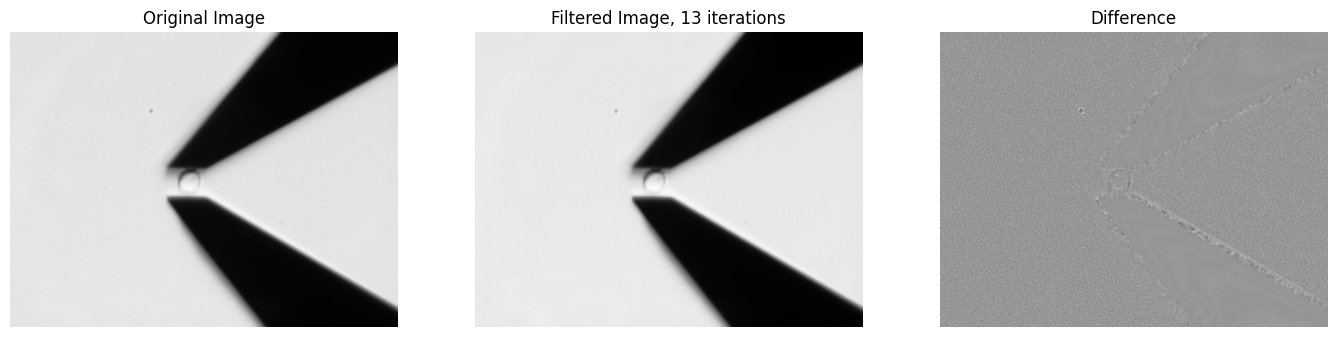

In [67]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (17,8))
axes[0].imshow(cell, cmap=cm.Greys_r)
axes[0].set_title('Original Image')
axes[0].set_axis_off()
axes[1].imshow(cell_filtered, cmap=cm.Greys_r)
axes[1].set_title(f'Filtered Image, {total_iter} iterations')
axes[1].set_axis_off()

axes[2].imshow(cell - cell_filtered, cmap=cm.Greys_r)
axes[2].set_title('Difference')
axes[2].set_axis_off()

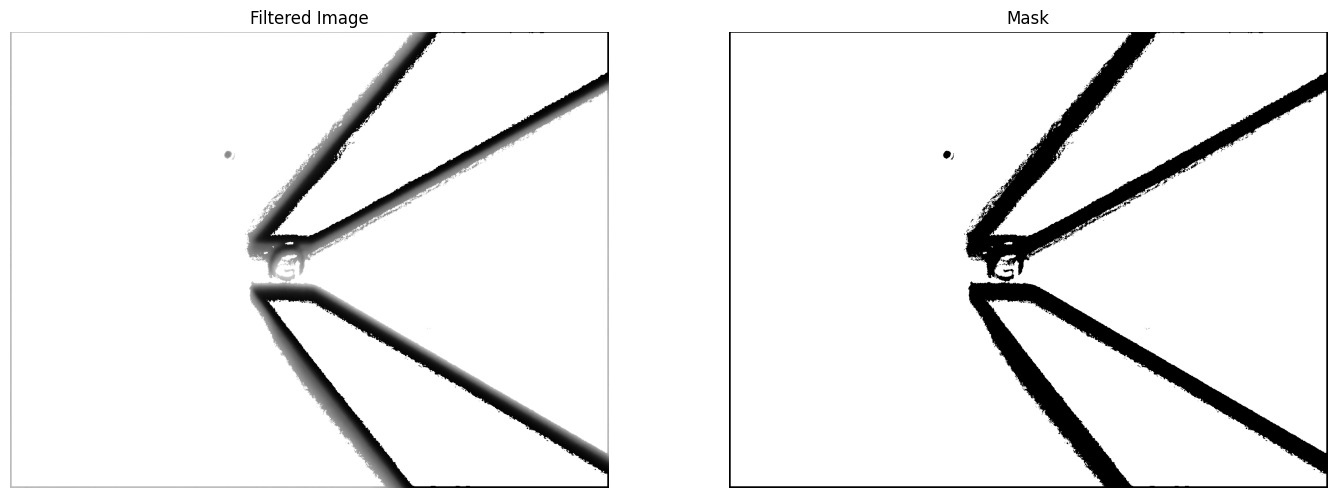

In [69]:
#take the first image, if every pixel on a 9x9 window is the same, then make it white

def get_mask(img):
    mask = np.zeros(img.shape)
    for i in range(4, img.shape[0] - 4):
        for j in range(4, img.shape[1] - 4):
            if np.all(img[i-4:i+5, j-4:j+5] < img[i,j]*1.05):
                mask[i,j] = 1
    return mask

mask = get_mask(cell_filtered)
cell_filtered[mask == 1] = 255

# plot the image
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (17,8))
axes[0].imshow(cell_filtered, cmap=cm.Greys_r)
axes[0].set_title('Filtered Image')
axes[0].set_axis_off()

axes[1].imshow(mask, cmap=cm.Greys_r)
axes[1].set_title('Mask')
axes[1].set_axis_off()
